Best parameters:  {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best score:  1.0
Validation accuracy:  1.0


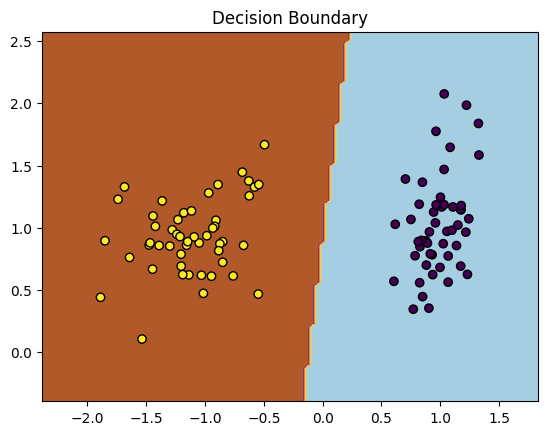

In [2]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=1)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2, 3, 4],
              'gamma': [0.1, 1, 10]}

# Create the SVC object
svc = SVC()

# Create the grid search object
grid_search = GridSearchCV(svc, param_grid, cv=5, return_train_score=True)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Test the model on the validation set
val_acc = grid_search.score(X_val, y_val)
print("Validation accuracy: ", val_acc)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary")
plt.show()
